In [17]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
df = pd.read_csv('Train_newColumns.csv')

In [20]:
#droppiamo un po di colonne
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [21]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    1013 non-null   int64
 1   DistanceFromHome       1013 non-null   int64
 2   MonthlyIncome          1013 non-null   int64
 3   NumCompaniesWorked     1013 non-null   int64
 4   PercentSalaryHike      1013 non-null   int64
 5   TotalWorkingYears      1013 non-null   int64
 6   TrainingTimesLastYear  1013 non-null   int64
 7   YearsAtCompany         1013 non-null   int64
 8   YearsWithCurrManager   1013 non-null   int64
 9   Stagnation             1013 non-null   int64
dtypes: int64(10)
memory usage: 79.3 KB


In [52]:
df_1 = dfnew[['MonthlyIncome', 'Stagnation', 'YearsWithCurrManager']]
df_2 = dfnew[['Stagnation', 'YearsAtCompany', 'TotalWorkingYears']]
df_3 = dfnew[['MonthlyIncome', 'TotalWorkingYears', 'Stagnation']]
df_4 = dfnew[['YearsWithCurrManager', 'TotalWorkingYears', 'TrainingTimesLastYear']]
df_5 = dfnew[['MonthlyIncome', 'YearsAtCompany', 'Stagnation']]

data_frames = [df_1, df_2, df_3, df_4, df_5]

In [72]:
#usiamo il MIN-MAX
scaler = StandardScaler()
z_scaled_df = []
#li fittiamo e trasformiamo tutti
for x in data_frames:
  z_scaled_df.append(scaler.fit_transform(x.values))

In [73]:
results = {}
for i, x in enumerate(z_scaled_df):
  results[str(i)] = []

choices_k = []
for k in range(2, 17):
  choices_k.append(k)

for i, x in enumerate(z_scaled_df):
  for k in choices_k:
    results[str(i)].append(KMeans(n_clusters=k, n_init= 10).fit(x))
  print(i)

0
1
2
3
4


In [74]:
to_plot_idx = 4
to_plot = data_frames[to_plot_idx]
lab = []
for e in to_plot.columns:
  lab.append(e)
x = lab[0]
y = lab[1]
z = lab[2]
k_plot = 6

In [75]:
res = results[str(to_plot_idx)][k_plot-2]
centers = scaler.inverse_transform(res.cluster_centers_)

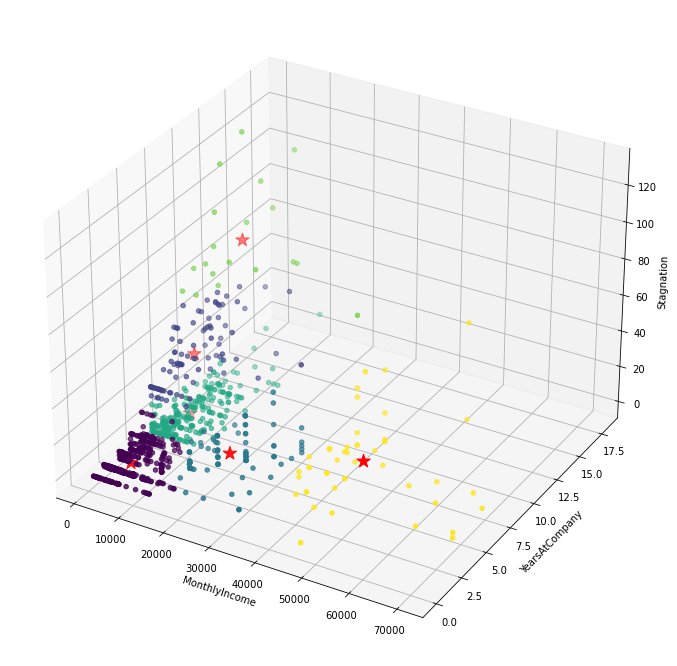

In [77]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=results[str(to_plot_idx)][k_plot-2].labels_, marker='o')
ax.scatter(centers[:,0], centers[:,1], centers[:,2], s=200, marker='*', c='r')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [44]:
centers

array([[6.30924579e+03, 7.02805836e+00, 1.04685315e+00],
       [6.43094737e+03, 9.47368421e+00, 1.17910931e+01],
       [3.79485696e+04, 5.13924051e+00, 1.54060370e+00],
       [6.14960000e+03, 1.06666667e+00, 1.57252747e-01],
       [8.97497059e+03, 1.21715686e+01, 1.37748869e+00],
       [5.71856250e+03, 4.07894737e+00, 4.11285425e-01]])

In [46]:
centers[:,0]

array([ 6309.24579125,  6430.94736842, 37948.56962025,  6149.6       ,
        8974.97058824,  5718.5625    ])

[[7.31190852e+03 3.74326620e-01 5.18848580e+00]
 [9.98040625e+03 7.70625000e+00 1.61718750e+01]
 [4.09460000e+04 3.39230769e-01 5.06250000e+00]
 [5.43434301e+03 1.40288208e-01 9.55804749e-01]
 [6.61842857e+03 1.45054945e+00 1.78214286e+01]
 [8.98747692e+03 1.40485207e+00 1.04538462e+01]]


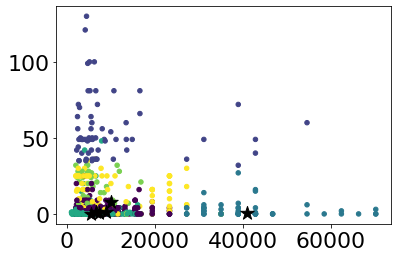

In [51]:
res = results[str(to_plot_idx)][k_plot-2]
centers = scaler.inverse_transform(res.cluster_centers_)
print(centers)

plt.scatter(dfnew['MonthlyIncome'], dfnew['Stagnation'], c=res.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='*', c='k')
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()